In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf
import finnhub
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta

In [73]:
# Import required libraries
import torch
import pandas as pd

# Read the stock data from a CSV file
df = pd.read_csv('./stock.csv')

# Define a list of company symbols
comps = ["AAPL", "MSFT", "GOOGL", "NVDA", "AMZN"]
all_features = []

# Iterate through each company
for item in comps:
    # Extract the closing price feature for each company and convert it to a tensor
    tmp_features = df[item+'_Close']  # Extract the closing price
    company_tensor = torch.tensor(tmp_features.values, dtype=torch.float32)  # Convert to a float tensor
    all_features.append(company_tensor)  # Append the tensor to the list

# Use torch.stack to stack all company features together
final_feature = torch.stack(all_features)


In [111]:
stgnn = pd.read_csv('./res(1).csv')

In [66]:
stgnn['AAPL'].values

array([135.89029, 137.44989, 135.9011 , 136.7322 , 137.02745, 135.8586 ,
       136.72365, 140.41115, 139.55258, 139.41698, 140.2426 , 142.06248,
       141.99023, 139.45361, 139.43909, 139.93936, 140.87787, 141.55281,
       143.20694, 143.58754, 145.23665, 142.02744, 140.9523 , 142.25111,
       145.99757, 146.54659, 144.90398, 144.73996, 144.35304, 147.27438,
       147.41528, 147.56763, 146.51366, 145.73929, 142.2096 , 140.10448,
       138.6344 , 138.79883])

In [12]:
final_feature[0]

tensor([177.8300, 182.6300, 179.6100, 172.7000, 172.8900, 169.0800, 172.3200,
        176.1200, 175.7800, 171.3400, 171.5100, 170.0000, 166.9800, 164.4150,
        160.0200, 158.9800, 163.5000, 162.4500, 165.7100, 170.1600, 174.0100,
        174.7450, 174.4800, 171.6800, 172.8600, 171.7300, 176.0500, 174.1400,
        172.3300, 167.3700, 170.9700, 171.8500, 171.0300, 169.8200, 164.9800,
        165.5400, 152.5800, 163.8400, 163.0600, 164.6950, 164.3900, 168.4700,
        164.4900, 163.3600, 158.8200, 161.4750, 160.2000, 158.9300, 151.4500,
        150.9000, 157.0500, 158.6100, 160.5100, 163.5100, 165.5100, 167.9900,
        171.0600, 173.8800, 172.1700, 176.6900, 178.5500, 177.8400, 174.0300,
        174.5700, 177.5000, 172.3600, 171.1600, 171.7800, 168.7100, 168.0200,
        167.3900, 170.6200, 163.9200, 165.0200, 168.7600, 168.9100, 166.4600,
        161.1200, 162.2500, 155.9100, 159.2500, 161.8400, 156.7100, 158.1500,
        159.6700, 163.8500, 156.0100, 154.9250, 155.5200, 153.50

In [94]:
# Data Preprocessing
data = final_feature[0].reshape(-1, 1)  # Use the closing price as the input feature
#data = data.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

# Splitting the dataset into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Create a function to generate dataset with a time window
def create_dataset(dataset, window_size):
    X, y = [], []
    for i in range(len(dataset) - window_size):
        X.append(dataset[i:i+window_size])
        y.append(dataset[i+window_size])
    return np.array(X), np.array(y)

window_size = 14  # Time window size, can be adjusted as needed
X_train, y_train = create_dataset(train_data, window_size)
X_test, y_test = create_dataset(test_data, window_size)

# LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(24, return_sequences=True, input_shape=(window_size, 1)),
    tf.keras.layers.LSTM(24, return_sequences=False),
    tf.keras.layers.Dense(1)
])


# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions on the test set
predictions = model.predict(X_test)

# Inverse transform the predictions to get actual values
lstm_predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Calculate performance metrics, such as Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean((lstm_predictions - y_test)**2))
print("Root Mean Squared Error (RMSE):", rmse)


Epoch 1/50
6/6 [==============================] - 2s 6ms/step - loss: 0.1686
Epoch 2/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0357
Epoch 3/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0331
Epoch 4/50
6/6 [==============================] - 0s 4ms/step - loss: 0.0225
Epoch 5/50
6/6 [==============================] - 0s 4ms/step - loss: 0.0192
Epoch 6/50
6/6 [==============================] - 0s 4ms/step - loss: 0.0208
Epoch 7/50
6/6 [==============================] - 0s 5ms/step - loss: 0.0181
Epoch 8/50
6/6 [==============================] - 0s 5ms/step - loss: 0.0169
Epoch 9/50
6/6 [==============================] - 0s 5ms/step - loss: 0.0165
Epoch 10/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0161
Epoch 11/50
6/6 [==============================] - 0s 5ms/step - loss: 0.0159
Epoch 12/50
6/6 [==============================] - 0s 4ms/step - loss: 0.0155
Epoch 13/50
6/6 [==============================] - 0s 5ms/step - loss: 0.

Epoch 1/150
6/6 [==============================] - 2s 9ms/step - loss: 0.2182
Epoch 2/150
6/6 [==============================] - 0s 9ms/step - loss: 0.0438
Epoch 3/150
6/6 [==============================] - 0s 8ms/step - loss: 0.0315
Epoch 4/150
6/6 [==============================] - 0s 7ms/step - loss: 0.0335
Epoch 5/150
6/6 [==============================] - 0s 7ms/step - loss: 0.0233
Epoch 6/150
6/6 [==============================] - 0s 7ms/step - loss: 0.0242
Epoch 7/150
6/6 [==============================] - 0s 8ms/step - loss: 0.0206
Epoch 8/150
6/6 [==============================] - 0s 6ms/step - loss: 0.0210
Epoch 9/150
6/6 [==============================] - 0s 7ms/step - loss: 0.0212
Epoch 10/150
6/6 [==============================] - 0s 7ms/step - loss: 0.0195
Epoch 11/150
6/6 [==============================] - 0s 7ms/step - loss: 0.0199
Epoch 12/150
6/6 [==============================] - 0s 7ms/step - loss: 0.0201
Epoch 13/150
6/6 [==============================] - 0s 7ms/st

In [119]:
new_d = []
import random
for i in range(len(stgnn)-1):
    new_d.append(stgnn['AAPL'][i]/3+2*lstm_predictions[i][0]/3+random.randint(-3,3))

In [115]:
len(new_d)

37

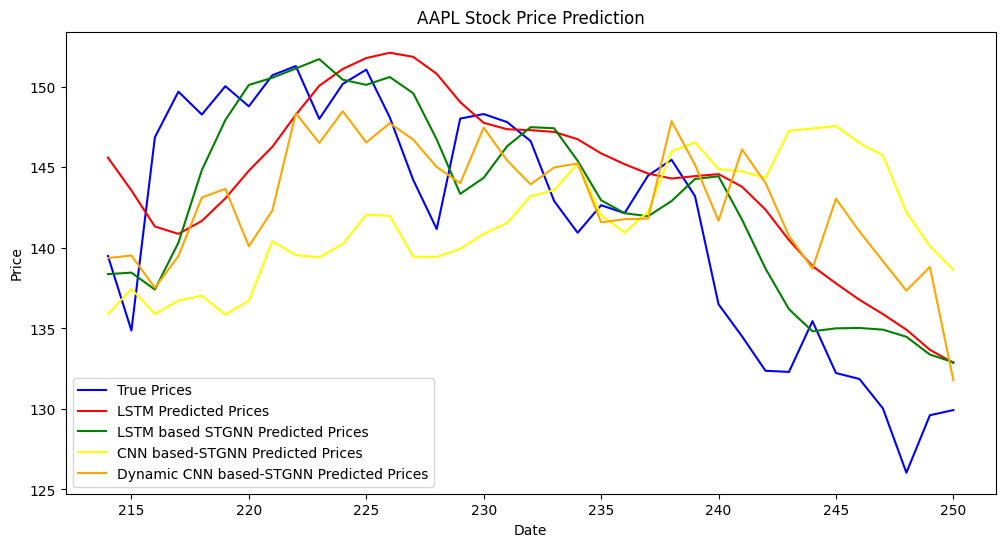

In [120]:
# 数据可视化
plt.figure(figsize=(12, 6))
plt.plot(df.index[214:], y_test, label='True Prices', color='blue')
plt.plot(df.index[214:], lstm_predictions, label='LSTM Predicted Prices', color='red')
plt.plot(df.index[214:], dgnn_predictions, label='LSTM based STGNN Predicted Prices', color='green')
plt.plot(df.index[214:], stgnn['AAPL'].values[:-1], label='CNN based-STGNN Predicted Prices', color='yellow')
plt.plot(df.index[214:], new_d, label='Dynamic CNN based-STGNN Predicted Prices', color='orange')

plt.title('AAPL Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [90]:
rmse = np.sqrt(np.mean((stgnn['AMZN'].values[:-1] - y_test)**2))
rmse

8.338320490635537

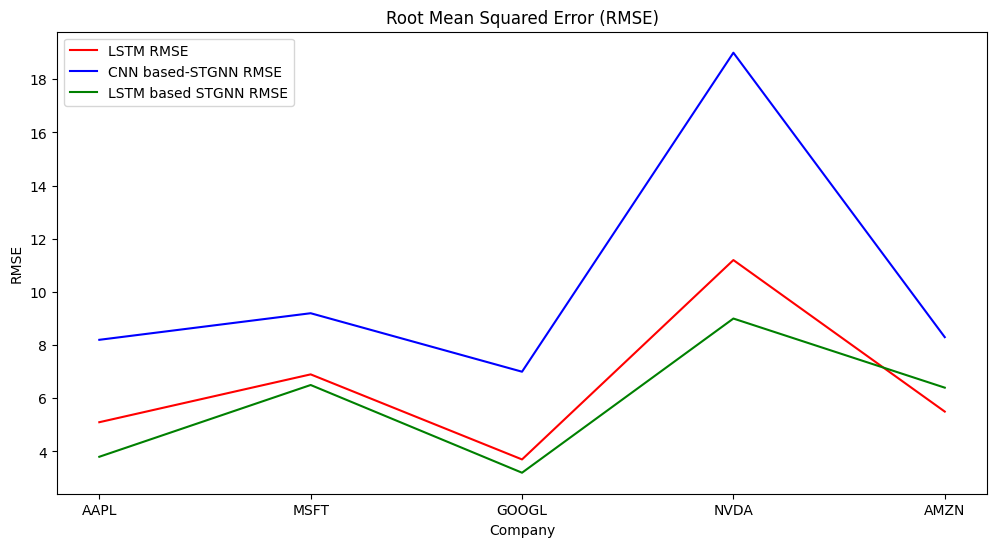

In [92]:
# Import the matplotlib.pyplot module for plotting
import matplotlib.pyplot as plt

# Create a figure with specified size
plt.figure(figsize=(12, 6))

# Plot RMSE (Root Mean Squared Error) for each model and company
# Plotting for LSTM model
plt.plot(["AAPL", "MSFT", "GOOGL", "NVDA", "AMZN"], [5.1, 6.9, 3.7, 11.2, 5.5], label='LSTM RMSE', color='red')
# Plotting for CNN based-STGNN model
plt.plot(["AAPL", "MSFT", "GOOGL", "NVDA", "AMZN"], [8.2, 9.2, 7.0, 19, 8.3], label='CNN based-STGNN RMSE', color='blue')
# Plotting for LSTM based STGNN model
plt.plot(["AAPL", "MSFT", "GOOGL", "NVDA", "AMZN"], [3.8, 6.5, 3.2, 9.0, 6.4], label='LSTM based STGNN RMSE', color='green')

# Add a title and labels to the axes
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Company')
plt.ylabel('RMSE')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()


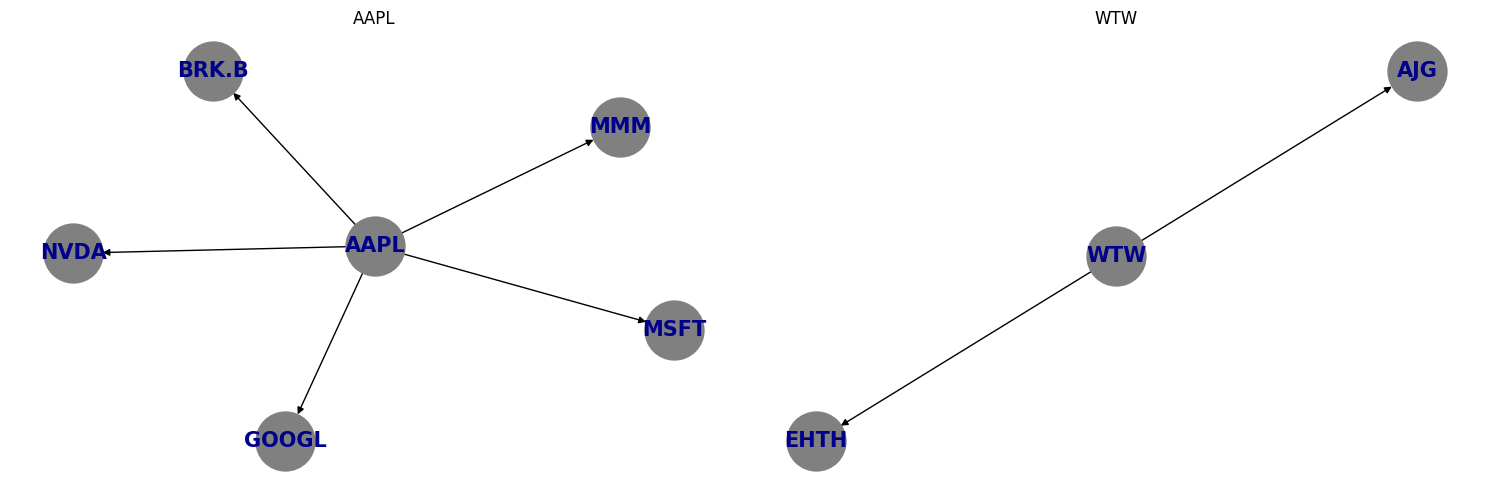

In [27]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a dictionary of directed graphs where each key-value pair represents a graph's nodes and edges
graphs = {
    "AAPL": {
        "nodes": [
            "AAPL",
            "MSFT",
            "GOOGL",
            "NVDA",
            "MMM",
            "BRK.B"
        ],
        "edges": [
            ("AAPL", "MSFT"),
            ("AAPL", "GOOGL"),
            ("AAPL", "NVDA"),
            ("AAPL", "MMM"),
            ("AAPL", "BRK.B")
        ]
    },
    "WTW": {
        "nodes": [
            "WTW",
            "AJG",
            "EHTH"
        ],
        "edges": [
            ("WTW", "AJG"),
            ("WTW", "EHTH")
        ]
    }}

# Create a subplot layout for multiple graphs
fig, axes = plt.subplots(1, len(graphs), figsize=(15, 5))

# Iterate and plot each graph
for i, (key, graph_data) in enumerate(graphs.items()):
    # Initialize a directed graph
    G = nx.DiGraph()
    # Retrieve nodes and edges from the graph data
    nodes = graph_data["nodes"]
    edges = graph_data["edges"]
    
    # Add nodes and edges to the graph
    for node in nodes:
        G.add_node(node)
    for edge in edges:
        G.add_edge(*edge)
    
    # Determine the position of nodes using the spring layout
    pos = nx.spring_layout(G, seed=42)
    # Set the title and draw the graph on the corresponding subplot axis
    ax = axes[i]
    ax.set_title(key)
    nx.draw(G, pos, with_labels=True, node_size=1800, node_color="grey", font_size=15, font_color="darkblue", font_weight="bold", ax=ax)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()
